# Analysis of Drug Regimen Capomulin on the effectiveness of control tumor growth

In this study, a total of 249 mice that were identified with SCC tumors were treated with various drug regimes for 45 days. The study investigated the effectiveness of different drugs in reducing tumor growth.

The results indicated that Capomulin appears to be an effective drug regimen since it had the second lowest mean tumor volume, tumor volume variance and tumor volume std deviation only behind Ramicane which had the lowest numbers in all categories.



Overall, the study suggests that Capomulin is a promising drug regimen for treating SCC tumors. However, further research may be needed to confirm its effectiveness controlling tumor growth.

# Prepare the Data

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# this line identifies all the duplicate rows in the combined_data DataFrame.
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

#Selects the "Mouse ID" and "Timepoint" columns from the duplicates Dataframe, so that we can see which specific Mouse IDs and Timepoints have duplicates.
duplicates[['Mouse ID', 'Timepoint']]


,Mouse ID,Timepoint
861,g989,0
863,g989,5
865,g989,10
867,g989,15
869,g989,20


In [5]:
duplicate_mouse_id = 'g989'
duplicate_data = combined_data.loc[combined_data['Mouse ID'] == duplicate_mouse_id]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
clean_df = combined_data.loc[combined_data['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
clean_df['Mouse ID'].nunique()


248

# Summary Statistics

In [8]:
# Group the data by drug regimen
grouped_data = clean_df.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
mean_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_volume = grouped_data["Tumor Volume (mm3)"].median()
variance_volume = grouped_data["Tumor Volume (mm3)"].var()
std_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the series into a summary DataFrame
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_volume,
    "Median Tumor Volume": median_volume,
    "Tumor Volume Variance": variance_volume,
    "Tumor Volume Std. Dev.": std_volume,
    "Tumor Volume Std. Err.": sem_volume
})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
summary_stats = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Create Bar Charts and Pie Charts

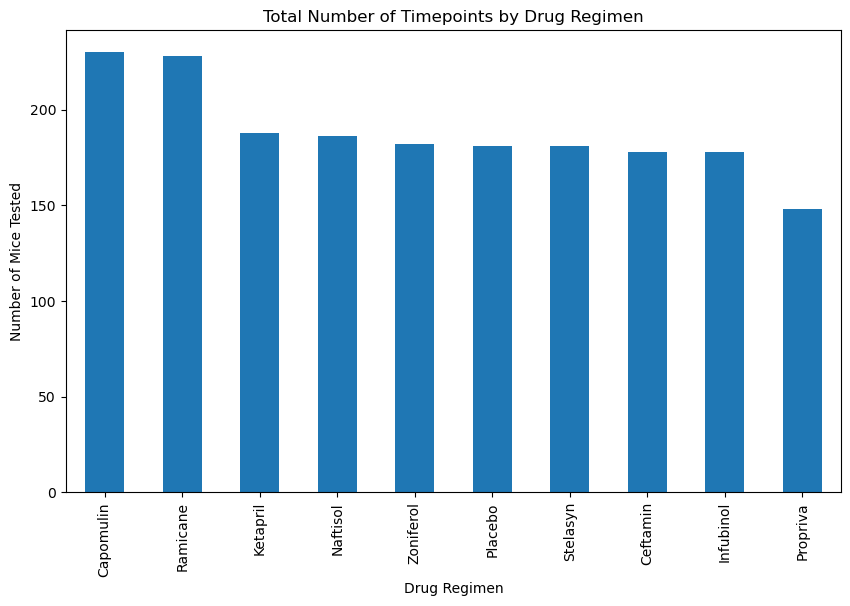

In [24]:
# Group the data by drug regimen and calculate the total number of timepoints
timepoint_count = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# Create a bar plot of the total number of timepoints for each drug regimen
timepoint_count.plot(kind='bar', figsize=(10,6))

# Set the chart title and axis labels
plt.title('Total Number of Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Display the chart
plt.show()


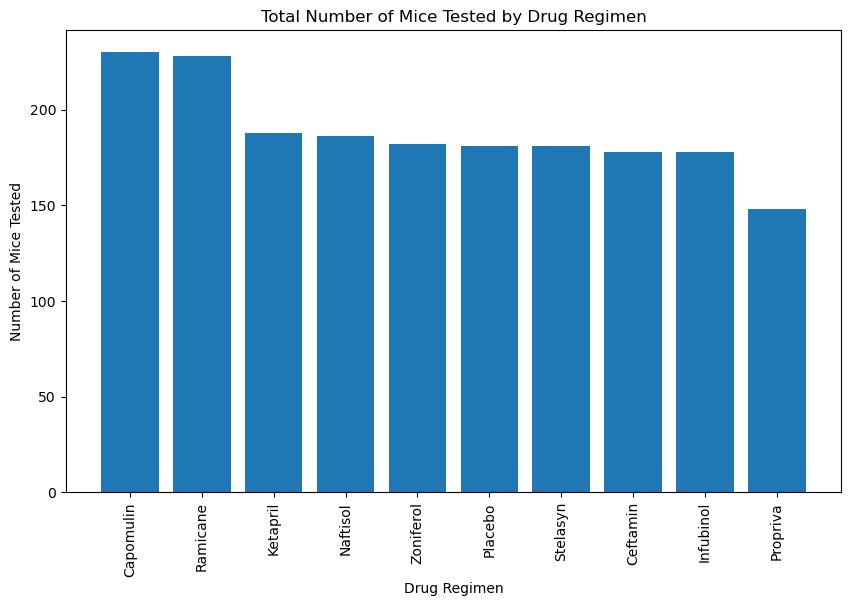

In [25]:
# Group the data by drug regimen and calculate the total number of mice tested
mice_count = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

# Create a bar plot of the total number of mice tested for each drug regimen
plt.figure(figsize=(10,6))
plt.bar(mice_count.index, mice_count.values)

# Set the chart title and axis labels
plt.title('Total Number of Mice Tested by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()


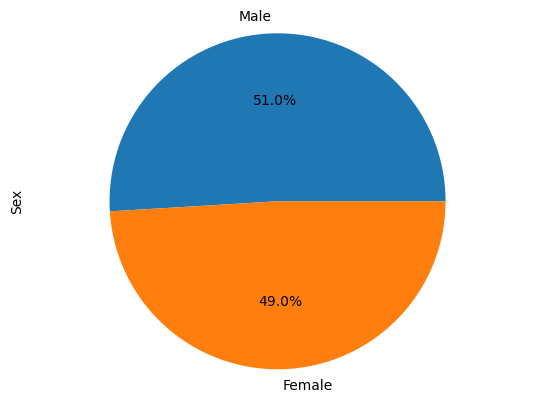

In [26]:
# Count the number of female and male mice
gender_count = clean_df["Sex"].value_counts()

# Generate the pie plot
gender_count.plot(kind="pie", y="Sex", autopct="%1.1f%%")

# Set the aspect ratio to be equal to make it a circle
plt.axis("equal")

# Show the plot
plt.show()


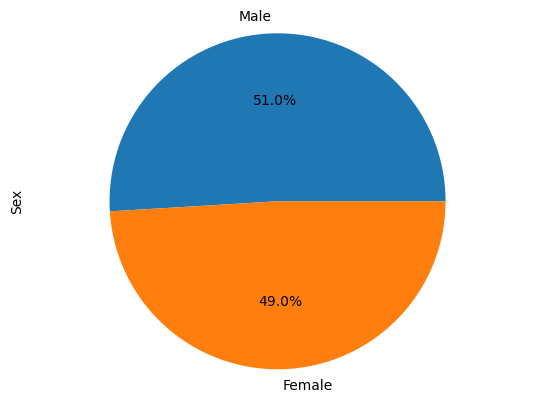

In [27]:
# Count the number of female and male mice
gender_count = clean_df["Sex"].value_counts()

# Generate the pie plot
plt.pie(gender_count.values, labels=gender_count.index, autopct="%1.1f%%")

# Set the aspect ratio to be equal to make it a circle
plt.axis("equal")

# Set the Y axis label
plt.ylabel("Sex")

# Show the plot
plt.show()



# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [28]:
# Get the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Filter the clean_df for the four drug regimens of interest
four_drugs_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Merge the filtered clean_df with the last timepoint df to get the final tumor volume for each mouse
final_volume_df = pd.merge(four_drugs_df, last_timepoint, on=["Mouse ID", "Timepoint"], how="right")[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

# Drop any rows with NaN values
final_volume_df.dropna(inplace=True)

# Print the final_volume_df
print(final_volume_df)



    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through treatments and calculate potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_volume_df.loc[final_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


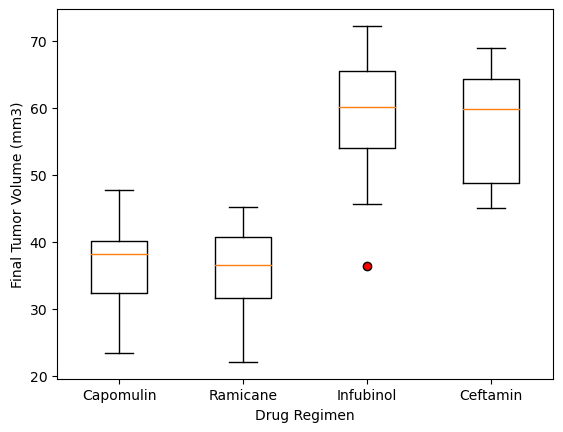

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a list of the four drug regimens of interest
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each drug in the drug list
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_volume_df.loc[final_volume_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Append the tumor vol data to the empty list for plotting
    tumor_vol_data.append(tumor_vol)
    
# Generate a box plot of the tumor volume data for each drug regimen
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=drug_list, flierprops=dict(markerfacecolor='red'))
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()



# Create a Line Plot and a Scatter Plot

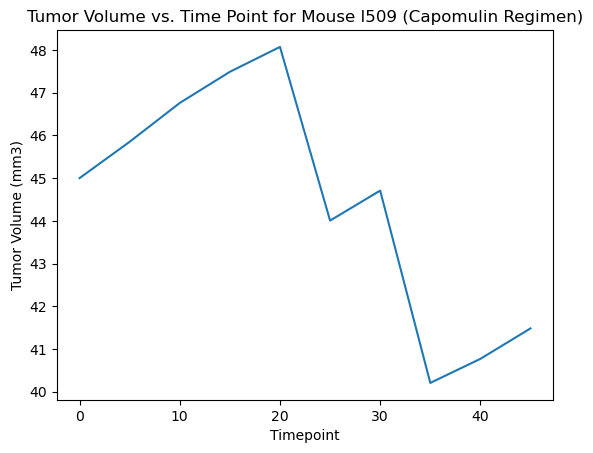

In [31]:
# Filter the clean_df for Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Select mouse i509 from Capomulin regimen
mouse_id = "l509"

# Filter the capomulin_df for the selected mouse ID
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]

# Generate a line plot of tumor volume vs. time point for the selected mouse
import matplotlib.pyplot as plt

plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])

# Set the plot title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Regimen)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()


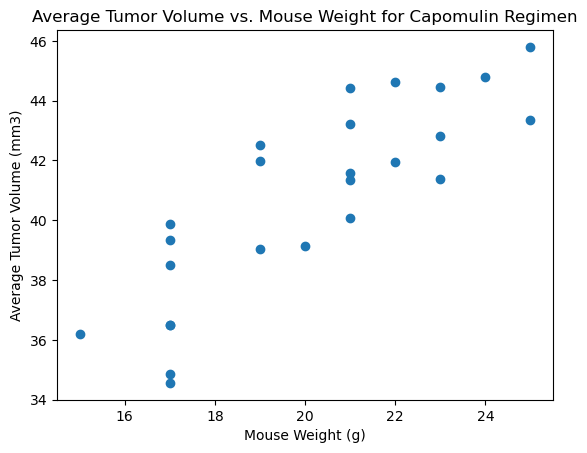

In [32]:
# Filter the clean_df for Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol)

# Set the plot title and labels
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


# Calculate Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


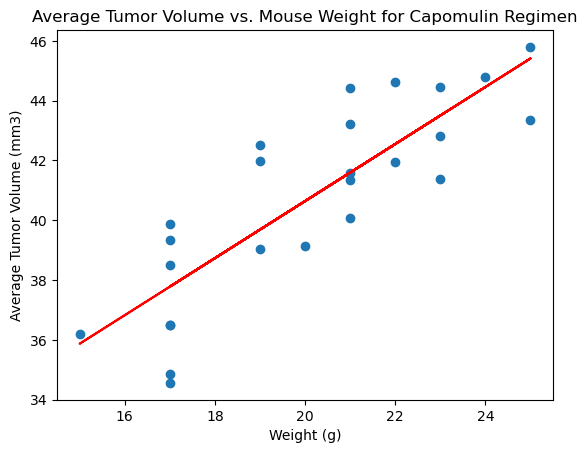

In [19]:
# Filter the clean_df for Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and weight for each mouse
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(mouse_weight, avg_tumor_vol)

# Set the plot title and labels
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient and print it
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")

# Calculate the linear regression model and plot the line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values, "r-")

# Show the plot
plt.show()
